### About Dataset
### Context

Develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns.
Content

Data for the case is available in CSV format having 6362620 rows and 10 columns.

### Data Dictionary:

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.
Inspiration

Following tasks & questions can be answered using the data,

    Data cleaning including missing values, outliers and multi-collinearity.
    Describe your fraud detection model in elaboration.
    How did you select variables to be included in the model?
    Demonstrate the performance of the model by using best set of tools.
    What are the key factors that predict fraudulent customer?
    Do these factors make sense? If yes, How? If not, How not?
    What kind of prevention should be adopted while company update its infrastructure?
    Assuming these actions have been implemented, how would you determine if they work?


1.Importing and data preprocessing

Datset is available at kaggle - fraudulent-transactions-data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ray

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('./Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


There are too many data in data set(6,362,620). It takes too many time to process by my laptop. So I reduced them to 600,000.

In [6]:
df1=df.sample(n=600000, random_state=0)

2.Visualization by 'isFraud' 0 or 1

<AxesSubplot:xlabel='isFraud', ylabel='isFlaggedFraud'>

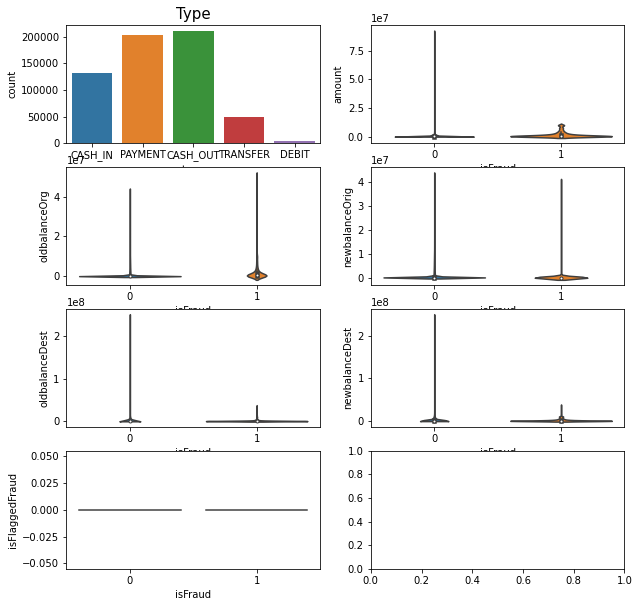

In [10]:
fig,ax=plt.subplots(4,2,figsize=(10,10))
sns.countplot(x=df1.type,ax=ax[0][0]).set_title('Type',size=15)
sns.violinplot(x=df1.isFraud,y=df['amount'],ax=ax[0][1])
sns.violinplot(x=df1.isFraud,y=df['oldbalanceOrg'],ax=ax[1][0])
sns.violinplot(x=df1.isFraud,y=df['newbalanceOrig'],ax=ax[1][1])
sns.violinplot(x=df1.isFraud,y=df['oldbalanceDest'],ax=ax[2][0])
sns.violinplot(x=df1.isFraud,y=df['newbalanceDest'],ax=ax[2][1])
sns.violinplot(x=df1.isFraud,y=df['isFlaggedFraud'],ax=ax[3][0])

3.Prediction model

In [8]:
#!pip install pycaret[full]

In [11]:
from pycaret.classification import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
df2=df1.drop(['step','nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [13]:
df_train, df_test = train_test_split(df2, random_state =100 , test_size = 0.3)

In [18]:
setup_df = setup(data= df_train, 
                 target = 'isFraud', 
                session_id=100,
                 data_split_stratify=True, 
                 silent=True, fold_shuffle=True,imputation_type='iterative', remove_multicollinearity = True,
    multicollinearity_threshold = 0.95, 
    fix_imbalance = True,
                 remove_outliers=True)

,Description,Value
0,session_id,100
1,Target,isFraud
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(420000, 7)"
5,Missing Values,0
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,0
9,High Cardinality Features,0


AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

In [19]:
models = compare_models(n_select=3)
models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9972,0.9760,0.7425,0.2516,0.3753,0.3743,0.4309,8.0280
et,Extra Trees Classifier,0.9971,0.9943,0.7675,0.2476,0.3740,0.3729,0.4346,5.9540
dt,Decision Tree Classifier,0.9968,0.8760,0.7550,0.2276,0.3490,0.3478,0.4128,0.3550
xgboost,Extreme Gradient Boosting,0.9959,0.9985,0.8962,0.2032,0.3310,0.3297,0.4254,7.4260
lightgbm,Light Gradient Boosting Machine,0.9919,0.9974,0.8869,0.1126,0.1997,0.1981,0.3141,0.9940
knn,K Neighbors Classifier,0.9873,0.9270,0.8523,0.0721,0.1330,0.1311,0.2457,0.6030
gbc,Gradient Boosting Classifier,0.9710,0.9955,0.9843,0.0373,0.0719,0.0698,0.1887,12.5890
ada,Ada Boost Classifier,0.9215,0.9745,0.9214,0.0132,0.0260,0.0238,0.1051,3.3590
nb,Naive Bayes,0.8360,0.7970,0.5755,0.0041,0.0081,0.0059,0.0380,0.0910
catboost,CatBoost Classifier,0.7959,0.7985,0.7214,0.1371,0.2301,0.2290,0.3131,20.6870


[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=100, verbose=0, warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=100, verbose=0, warm_start=False),
 Deci

In [20]:
xgb = create_model("xgboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9955,0.9990,0.9355,0.1895,0.3152,0.3140,0.4200
1,0.9957,0.9987,0.9062,0.2000,0.3277,0.3264,0.4246
2,0.9957,0.9984,0.9375,0.2013,0.3315,0.3302,0.4334
3,0.9961,0.9986,0.8125,0.2000,0.3210,0.3197,0.4020
4,0.9959,0.9990,0.9375,0.2098,0.3429,0.3416,0.4424
5,0.9960,0.9992,0.9688,0.2168,0.3543,0.3531,0.4573
6,0.9958,0.9988,0.9688,0.2095,0.3444,0.3432,0.4494
7,0.9958,0.9969,0.6875,0.1705,0.2733,0.2720,0.3411
8,0.9958,0.9994,0.9688,0.2123,0.3483,0.3471,0.4525
9,0.9966,0.9973,0.8387,0.2222,0.3514,0.3502,0.4307


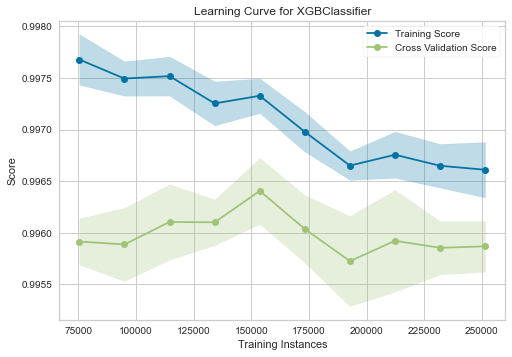

In [21]:
plot_model(estimator = xgb , plot= "learning")

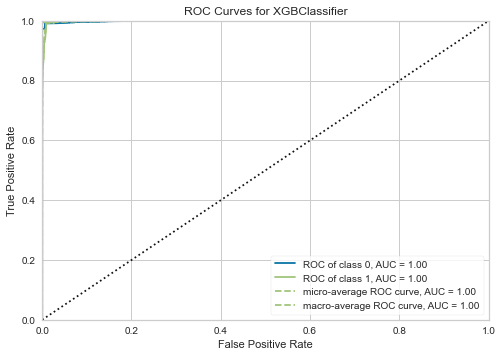

In [22]:
plot_model(estimator = xgb , plot= "auc")

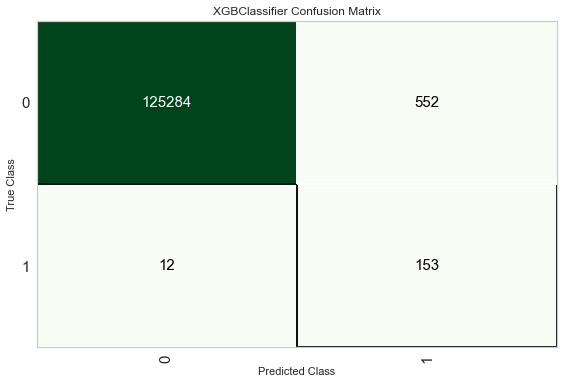

In [24]:
plot_model(estimator = xgb , plot= "confusion_matrix") #, plot_kwargs = {'percent' : True})

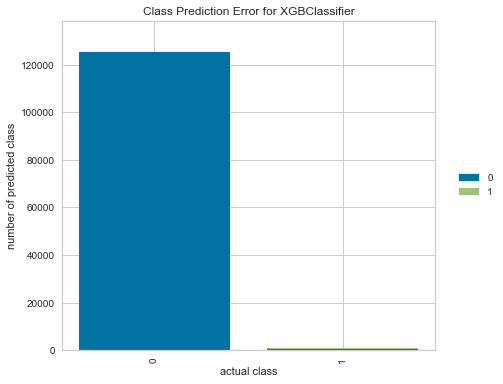

In [25]:
plot_model(estimator = xgb, plot = "error")

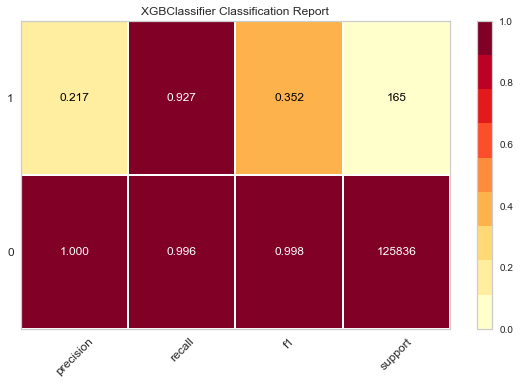

In [26]:
plot_model(estimator = xgb, plot = "class_report")

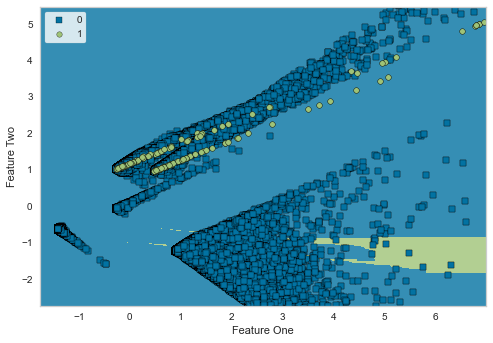

In [27]:
plot_model(estimator = xgb, plot = "boundary")

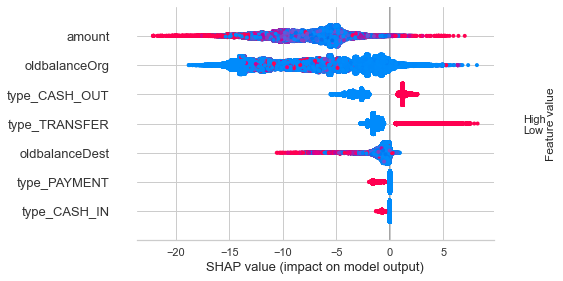

In [28]:
interpret_model(xgb)

In [29]:
predict_model(xgb);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9955,0.9990,0.9273,0.2170,0.3517,0.3503,0.4474


In [30]:
pred = predict_model(xgb, data=df_test)
pred.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Label,Score
3244034,CASH_OUT,65799.25,0.00,0.00,921124.90,986924.15,0,0,1.0
5220474,PAYMENT,24701.30,0.00,0.00,0.00,0.00,0,0,1.0
1401746,CASH_IN,218290.18,3876479.71,4094769.89,26935023.18,26716733.00,0,0,1.0
3074987,PAYMENT,293.19,0.00,0.00,0.00,0.00,0,0,1.0
2105091,CASH_IN,232593.63,1827969.82,2060563.45,1325693.21,1093099.59,0,0,1.0


In [31]:
accuracy_score(pred['isFraud'], pred['Label'])

0.9953